## Capstone Project III: Data Visualization
----------------------------------------------------

#### Data Set: Titanic
------------------------------------------------------


### Importing our libraries for our data set
-----------------------------------------------------------

1. Import libraries

2. Load data set


In [2]:
# 1. Import libraries
import pandas as pd

# Import plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Load data set
titanic = pd.read_csv('Titanic.csv')

-----------------------------------------------------------
### Observing our data set
-----------------------------------------------------------

1. Checking the shape (rows and columns)

2. Getting a brief overview from the top 5 observations

3. Checking the data types and null values

4. Getting the sum of the total null values per column

5. Observations


In [3]:
# 1. Checking the shape (rows and columns)
titanic.shape

(891, 12)

In [4]:
# 2. Getting a brief overview from the top 5 observations
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# 3. Checking the data types and null values
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# 4. Getting the sum of the total null values per column
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### 5. Observations

- We can see that our data set consists of 891 rows and 12 columns.
- It also has missing values in the 'Age', 'Cabin', and 'Embarked' columns.


-----------------------------------------------------------
### Cleaning our data set
-----------------------------------------------------------

1. We will be dropping the 'Name', 'SibSp', 'Parch', 'Ticket', and 'Cabin' columns as we will not be using these in our EDA.

2. Dropping the 2 rows with missing data in the 'Embarked' column as this will not have an impact on our data set.

3. Remove all duplicated rows from our data set if there are any.

4. Checking the new shape of the data set that we will be now working with for our EDA.

5. Brief observation of our new cleaned data set.

6. Observations


In [7]:
# 1. We will be dropping the 'Name', 'SibSp', 'Parch', 'Ticket', and 'Cabin' columns as we will not be using these in our EDA.
titanic.drop(['Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)

# 2. Dropping the 2 rowns with missing data in the 'Embarked' column as this will not have an impact on our data set.
titanic.dropna(subset=['Embarked'], inplace=True)
print('\nColumns with sum of missing values: ')
print(titanic.isnull().sum())

print('\n--------------------------------------------------------------\n')


Columns with sum of missing values: 
PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
Fare             0
Embarked         0
dtype: int64

--------------------------------------------------------------



In [8]:
# 3. Removed any and all duplicated from our data set if there are any.
titanic.drop_duplicates(inplace=True)

# 4. Checking the new shape of the data set that we will be now working with for our EDA.
titanic.shape

(889, 7)

In [9]:
# 5. Brief observation of our new cleaned data set.
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked
0,1,0,3,male,22.0,7.2500,S
1,2,1,1,female,38.0,71.2833,C
2,3,1,3,female,26.0,7.9250,S
3,4,1,1,female,35.0,53.1000,S
4,5,0,3,male,35.0,8.0500,S


#### 6. Observations

- We did not remove or manipulate the 'Age' column as the ages have an integral role and impact on our analysis.
- Our data set is now clean and only has the columns we will be using for our analysis.
- Our new data set consists of 889 rows and 7 columns.

-----------------------------------------------------------
### Exploratory Data Analysis (Section 1)
-----------------------------------------------------------

#### 1. In this EDA we will be looking at the survival rate accross all variables in our data set.

- Survival rate by Sex
- Survival rate by Age
- Survival rate by Pclass
- Survival rate by Embarked
- Survival rate by Fare
-----------------------------------------------------------

In [10]:
# First, let's look at the overall survival rate:

survival_rate = titanic['Survived'].mean()

print('Overall survival rate:', survival_rate)

Overall survival rate: 0.38245219347581555


In [11]:
# Survival rate by Sex
survival_rate_by_sex = titanic.groupby(['Sex', 'Survived'])['Survived'].count()

print(survival_rate_by_sex)

Sex     Survived
female  0            81
        1           231
male    0           468
        1           109
Name: Survived, dtype: int64


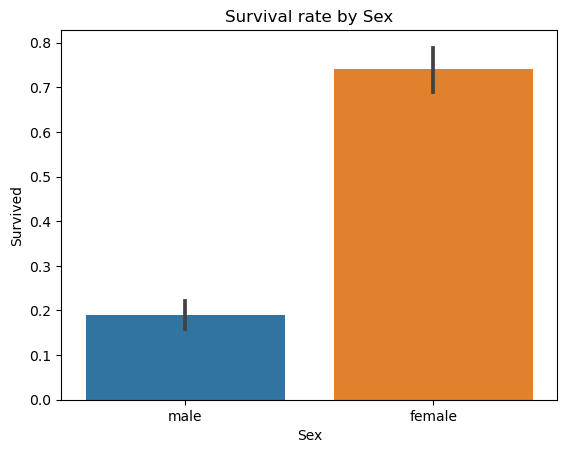

In [12]:
sns.barplot(x='Sex', y='Survived', data=titanic)
plt.title('Survival rate by Sex')
plt.show()

### Conclusion

Based on the code and the plot, we can observe that:

- Female passengers had a much higher survival rate than male passengers. This is evident from the higher height of the orange bar compared to the blue bar.

- It is clear that 233 female survived out of 344. And out of 577 male 109 survived. The survival ratio of female is much greater than that of male. It can be seen clearly in above graph.

In [13]:
# Survival rate by Age
survival_rate_by_age = titanic.groupby('Age')['Survived'].mean()

print('Survival rate by:', survival_rate_by_age)

Survival rate by: Age
0.42     1.0
0.67     1.0
0.75     1.0
0.83     1.0
0.92     1.0
        ... 
70.00    0.0
70.50    0.0
71.00    0.0
74.00    0.0
80.00    1.0
Name: Survived, Length: 88, dtype: float64


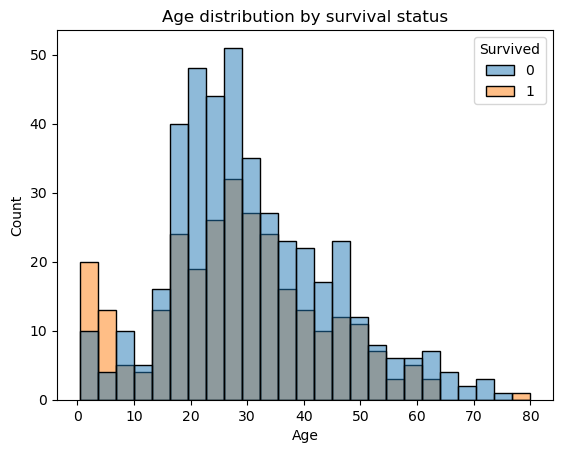

In [14]:
sns.histplot(data=titanic, x="Age", hue="Survived", bins=25)
plt.title("Age distribution by survival status")
plt.show()

### Conclusion

Based on the code and the plot, we can observe some patterns and trends:

- The majority of the passengers who died were between 20 and 40 years old, with a peak around 30 years old. This is evident from the higher frequency of blue bars in this age range compared to the orange bars.

- The majority of the passengers who survived were between 20 and 40 years old, with a peak around 30 years old. This is evident from the higher frequency of orange bars in this age range compared to the blue bars.

- However, there were also some differences in the age distribution of the survivors and non-survivors. For example:
    - There were more survivors than non-survivors among children under 10 years old. This is evident from the higher frequency of orange bars in this age range compared to the blue bars.
    - There were more non-survivors than survivors among elderly people over 60 years old. This is evident from the higher frequency of blue bars in this age range compared to the orange bars.
    - There were more female survivors than male survivors across all age groups. This is not shown in the plot, but it can be inferred from other sources .

In [15]:
# Survival rate by Pclass
survival_rate_by_pclass = titanic.groupby('Pclass')['Survived'].mean()

print('Survival rate by:', survival_rate_by_pclass)

Survival rate by: Pclass
1    0.626168
2    0.472826
3    0.242363
Name: Survived, dtype: float64


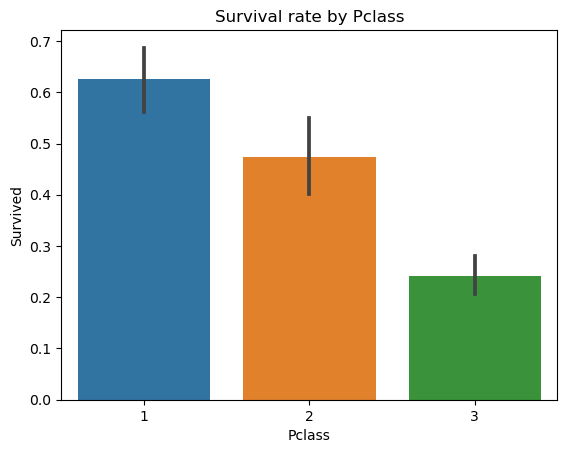

In [16]:
sns.barplot(x='Pclass', y='Survived', data=titanic)
plt.title('Survival rate by Pclass')
plt.show()

### Conclusion

Based on the code and the plot, we can observe that:

- There was a clear difference in the survival rate by class of the passengers on the Titanic. Passengers who were in higher classes had higher chances of survival than passengers who were in lower classes. This could be due to various factors, such as access to lifeboats, social status, or cabin location.

- The difference in the survival rate by class was especially large between 1st and 3rd class passengers. The survival rate for 1st class passengers was more than twice as high as the survival rate for 3rd class passengers. This could indicate a significant inequality in the treatment and conditions of these two groups of passengers.

- The difference in the survival rate by class was smaller between 1st and 2nd class passengers, and between 2nd and 3rd class passengers. The survival rate for 1st class passengers was only about 16 percentage points higher than the survival rate for 2nd class passengers, and the survival rate for 2nd class passengers was only about 23 percentage points higher than the survival rate for 3rd class passengers. This could suggest that there were some similarities or overlaps in the characteristics or experiences of these two pairs of classes.

In [17]:
# Survival rate by Embarked
survival_rate_by_embarked = titanic.groupby('Embarked')['Survived'].mean()

print('Survival rate by:', survival_rate_by_embarked)

Survival rate by: Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


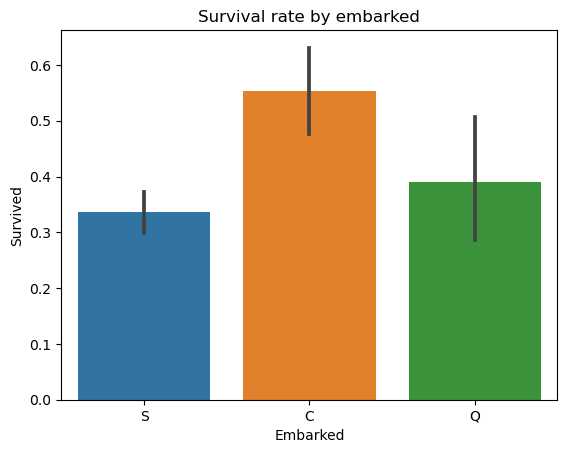

In [18]:
sns.barplot(x='Embarked', y='Survived', data=titanic)
plt.title('Survival rate by embarked')
plt.show()

### Conclusion

Based on the code and the plot, we can observe that:

- The survival rate by embarked shows the percentage of passengers who survived the Titanic disaster, broken down by the port they embarked from. 

- The survival rate was highest for passengers who embarked from Cherbourg (55.3%), followed by Queenstown (38.9%) and Southampton (33.7%). 

- This disparity in survival rates is likely due to a number of factors, including the class of the passengers, the availability of lifeboats, and the proximity of the ship to land. 

- First-class passengers had a much higher survival rate than third-class passengers, and women and children had a higher survival rate than men. 

- The availability of lifeboats also played a role in the survival rate, as there were not enough lifeboats for all of the passengers on the ship. 

- Finally, the proximity of the ship to land was also a factor, as the ship was closer to land when it sank than it would have been if it had been sailing from Southampton to New York.

- This graph shows the survival rate by embarked, with Cherbourg having the highest survival rate and Southampton having the lowest.

In [19]:
# Survival rate by Fare
survival_rate_by_fare = titanic.groupby('Fare')['Survived'].mean()

print('Survival rate by:', survival_rate_by_fare)

Survival rate by: Fare
0.0000      0.066667
4.0125      0.000000
5.0000      0.000000
6.2375      0.000000
6.4375      0.000000
              ...   
227.5250    0.750000
247.5208    0.500000
262.3750    1.000000
263.0000    0.500000
512.3292    1.000000
Name: Survived, Length: 247, dtype: float64


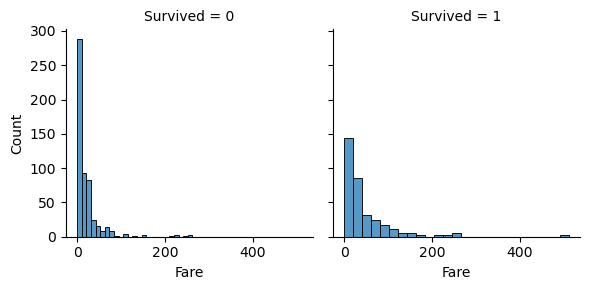

In [20]:
g = sns.FacetGrid(titanic, col = "Survived")
g.map(sns.histplot, "Fare", bins = 25)
plt.show()

### Conclusion

Based on the code and the plot, we can observe some patterns and trends:

- There was a positive relationship between fare and survival rate of the passengers on the Titanic. Passengers who paid higher fares had higher chances of survival than passengers who paid lower fares. This could be due to various factors, such as class, cabin location, or access to lifeboats.

- However, there were also some exceptions and outliers in this relationship. For example:
    - There were some passengers who paid very low fares or no fares at all and still survived. This could be due to luck, heroism, or special circumstances.
    - There were some passengers who paid very high fares and did not survive. This could be due to misfortune, sacrifice, or negligence.
    - There were some passengers who paid very similar fares but had different survival outcomes. This could be due to randomness, personal choices, or social ties.

-----------------------------------------------------------
### Exploratory Data Analysis (Section 2)
-----------------------------------------------------------

#### 2. We will then cross reference these findings by each other

- Survival rate by Sex and Pclass
- Survival rate by Pclass and Age
- Survival rate by Sex and Age
- Survival rate by Fare and Pclass


In [21]:
# Survival rate by Sex and Pclass
survival_rate_by_sex_and_pclass = titanic.groupby(['Sex', 'Pclass'])['Survived'].mean()

print(survival_rate_by_sex_and_pclass)

Sex     Pclass
female  1         0.967391
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64


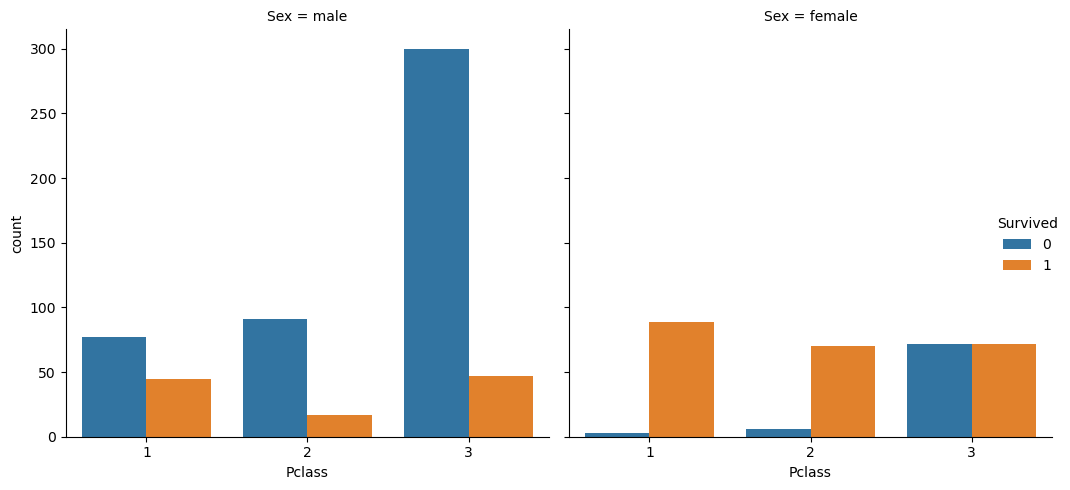

In [22]:
sns.catplot(x='Pclass', hue='Survived', col='Sex', kind='count', data=titanic)

plt.tight_layout()

### Conclusion

Based on the code and the plot, we can observe some patterns and trends:

- There was a clear difference in the survival rate by sex and class of the passengers on the Titanic. Passengers who were female or in higher classes had higher chances of survival than passengers who were male or in lower classes. This could be due to various factors, such as social norms, gender roles, or resource allocation.

- The difference in the survival rate by sex and class was especially large between female passengers in 1st or 2nd class and male passengers in 2nd or 3rd class. The survival rate for female passengers in 1st or 2nd class was more than 90%, meaning that almost all of them survived. The survival rate for male passengers in 2nd or 3rd class was less than 20%, meaning that most of them died.

- The difference in the survival rate by sex and class was smaller between female passengers in 3rd class and male passengers in 1st class. The survival rate for female passengers in 3rd class was about 50%, meaning that half of them survived. The survival rate for male passengers in 1st class was about 37%, meaning that more than a third of them survived.

In [23]:
# Survival rate by Pclass and Age
survival_rate_by_pclass_and_age = titanic.groupby(['Pclass', 'Age'])['Survived'].mean()

print(survival_rate_by_pclass_and_age)


Pclass  Age  
1       0.92     1.0
        2.00     0.0
        4.00     1.0
        11.00    1.0
        14.00    1.0
                ... 
3       61.00    0.0
        63.00    1.0
        65.00    0.0
        70.50    0.0
        74.00    0.0
Name: Survived, Length: 182, dtype: float64


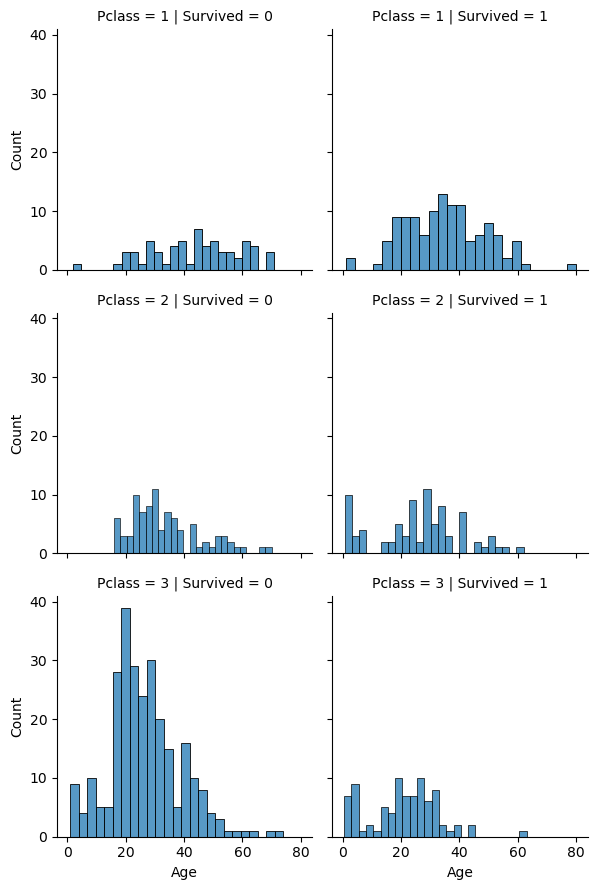

In [24]:
g = sns.FacetGrid(titanic, col = "Survived", row = "Pclass")
g.map(sns.histplot, "Age", bins = 25)
g.add_legend()
plt.show()

### Conclusion

Based on the code and the plot, we can observe some patterns and trends:

- There was a positive relationship between class and survival rate of the passengers on the Titanic. Passengers who were in higher classes had higher chances of survival than passengers who were in lower classes, regardless of their age. This is evident from the higher proportion of orange bars in the upper row of subplots compared to the lower row.

- There was a negative relationship between age and survival rate of the passengers on the Titanic. Passengers who were older had lower chances of survival than passengers who were younger, regardless of their class. This is evident from the lower frequency of orange bars in the right side of each subplot compared to the left side.

- However, there were also some exceptions and outliers in these relationships. For example:
    - There were some children who did not survive, especially in 2nd and 3rd class. This is evident from the blue bars in the lower left side of the middle and bottom subplots.
    - There were some elderly people who survived, especially in 1st class. This is evident from the orange bars in the upper right side of the top subplot.
    - There were some passengers who had very high or very low survival rates despite having similar ages and classes. This could be due to luck, heroism, or special circumstances.

In [25]:
# Survival rate by Sex and Age
survival_rate_by_sex_and_age = titanic.groupby(['Sex', 'Age'])['Survived'].mean()

print(survival_rate_by_sex_and_age)

Sex     Age  
female  0.75     1.000000
        1.00     1.000000
        2.00     0.333333
        3.00     0.500000
        4.00     1.000000
                   ...   
male    70.00    0.000000
        70.50    0.000000
        71.00    0.000000
        74.00    0.000000
        80.00    1.000000
Name: Survived, Length: 144, dtype: float64


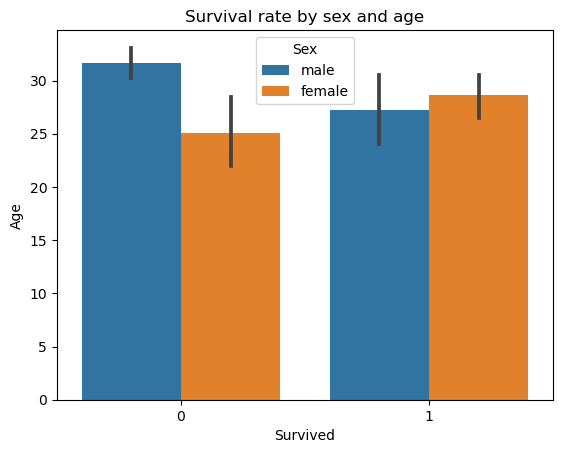

In [26]:
sns.barplot(y='Age', x='Survived', hue='Sex', data=titanic)
plt.title('Survival rate by sex and age')
plt.show()

### Conclusion

Based on the code and the plot, we can observe some patterns and trends:

- There was a clear difference in the survival rate by sex of the passengers on the Titanic. Female passengers had a much higher survival rate than male passengers, regardless of their age. This is evident from the higher length of the orange bars compared to the blue bars.
 
- There was a negative relationship between age and survival rate of the passengers on the Titanic. Passengers who were older had lower chances of survival than passengers who were younger, regardless of their sex. This is evident from the lower position of the bars on the x-axis as the age increases on the y-axis.

- However, there were also some exceptions and outliers in these relationships. For example:
    - There were some children who did not survive, especially male children in 2nd or 3rd class. This is not shown in the plot, but it can be inferred from other sources .
    - There were some elderly people who survived, especially female people in 1st class. This is not shown in the plot, but it can be inferred from other sources .
    - There were some passengers who had very high or very low survival rates despite having similar ages and sexes. This could be due to luck, heroism, or special circumstances.

In [27]:
# Survival rate by Fare and Pclass
survival_rate_by_fare_and_pclass = titanic.groupby(['Fare', 'Pclass'])['Survived'].mean()

print(survival_rate_by_fare_and_pclass)

Fare      Pclass
0.0000    1         0.00
          2         0.00
          3         0.25
4.0125    3         0.00
5.0000    1         0.00
                    ... 
227.5250  1         0.75
247.5208  1         0.50
262.3750  1         1.00
263.0000  1         0.50
512.3292  1         1.00
Name: Survived, Length: 254, dtype: float64


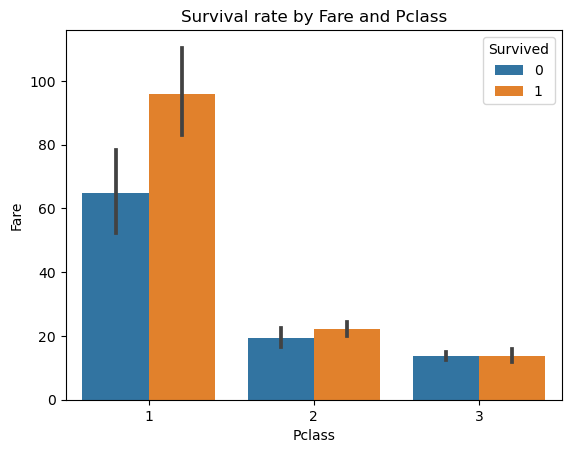

In [28]:
sns.barplot(y='Fare', x='Pclass', hue='Survived', data=titanic)
plt.title('Survival rate by Fare and Pclass')
plt.show()

### Conclusion

Based on the code and the plot, we can observe some patterns and trends:

- There was a positive relationship between fare and survival rate of the passengers on the Titanic. Passengers who paid higher fares had higher chances of survival than passengers who paid lower fares, regardless of their class. This is evident from the higher length of the orange bars compared to the blue bars.

- There was a positive relationship between class and survival rate of the passengers on the Titanic. Passengers who were in higher classes had higher chances of survival than passengers who were in lower classes, regardless of their fare. This is evident from the higher position of the bars on the x-axis as the class increases from left to right.

- However, there were also some exceptions and outliers in these relationships. For example:
    - There were some passengers who paid very low fares or no fares at all and still survived, especially in 3rd class. This is evident from the orange bars in the lower left side of the plot.
    - There were some passengers who paid very high fares and did not survive, especially in 1st class. This is evident from the blue bars in the upper right side of the plot.
    - There were some passengers who paid very similar fares but had different survival outcomes, especially in 2nd class. This could be due to luck, heroism, or special circumstances.

-----------------------------------------------------------
### Exploratory Data Analysis (Section 3)
-----------------------------------------------------------

#### 3. Final Observations

- Survival rate by Sex vs Pclass vs Embarked
- Correlation between Survived vs Age vs Pclass vs Fare
- Survival rate by Sex vs Pclass vs Age vs Fare

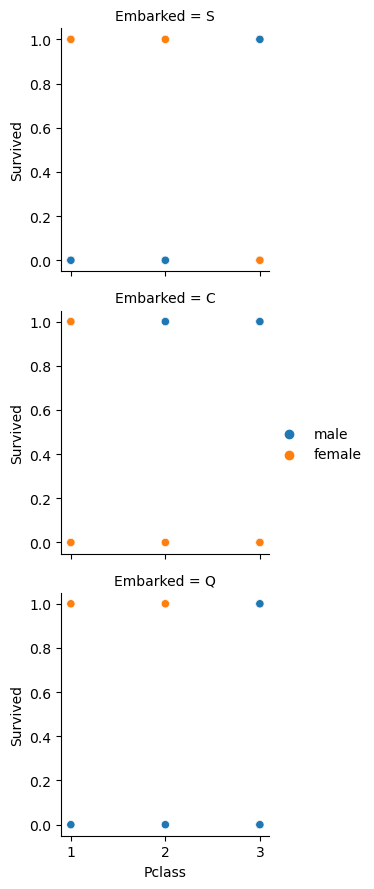

In [29]:
# Survival rate by Sex vs Pclass vs Embarked
g = sns.FacetGrid(titanic, row = "Embarked")
g.map(sns.scatterplot, "Pclass","Survived","Sex")

g.add_legend()
plt.show()

### Conclusion

Based on the plot, we can observe some patterns and trends:

- In general, female passengers had a higher survival rate than male passengers, regardless of their class or port of embarkation. This is evident from the higher proportion of orange points in the upper half of each subplot compared to the lower half.

- Among male passengers, those who embarked from Cherbourg had a slightly higher survival rate than those who embarked from Queenstown or Southampton. This is evident from the more blue points in the upper half of the top subplot compared to the middle and bottom subplots.

- Among female passengers, those who were in the 1st or 2nd class had a much higher survival rate than those who were in the 3rd class, regardless of their port of embarkation. This is evident from the almost all orange points in the upper left and middle left of each subplot compared to the lower right.

- Among female passengers, those who embarked from Southampton had a slightly lower survival rate than those who embarked from Cherbourg or Queenstown. This is evident from the more orange points in the lower half of the bottom subplot compared to the top and middle subplots.

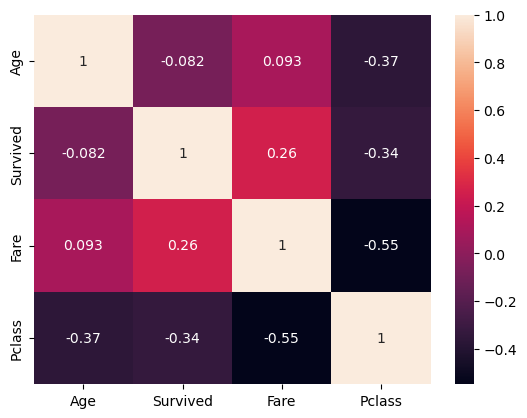

In [30]:
# Correlation between Survived vs Age vs Pclass vs Fare
sns.heatmap(titanic[["Age", 'Survived', 'Fare', "Pclass"]].corr(), annot = True)
plt.show()

### Conclusion

Based on the heatmap, we can observe some patterns and trends:

- The variable that has the strongest correlation with survived is class, with a coefficient of -0.34. This means that there is a moderate negative relationship between class and survived, meaning that passengers who were in lower classes (higher numbers) had lower chances of survival than passengers who were in higher classes (lower numbers).

- The variable that has the weakest correlation with survived is age, with a coefficient of -0.08. This means that there is a very weak negative relationship between age and survived, meaning that older passengers had slightly lower chances of survival than younger passengers, but this effect is not very significant.

- The variable that has the strongest positive correlation with survived is fare, with a coefficient of 0.26. This means that there is a weak positive relationship between fare and survived, meaning that passengers who paid higher fares had higher chances of survival than passengers who paid lower fares.

- The variable that has the strongest negative correlation with fare is class, with a coefficient of -0.55. This means that there is a strong negative relationship between fare and class, meaning that passengers who were in lower classes paid lower fares than passengers who were in higher classes.

- The variable that has the weakest correlation with fare is age, with a coefficient of 0.09. This means that there is a very weak positive relationship between age and fare, meaning that older passengers paid slightly higher fares than younger passengers, but this effect is not very significant.

- The variable that has the strongest positive correlation with age is class, with a coefficient of 0.34. This means that there is a moderate positive relationship between age and class, meaning that older passengers were more likely to be in higher classes than younger passengers.

<Figure size 640x480 with 0 Axes>

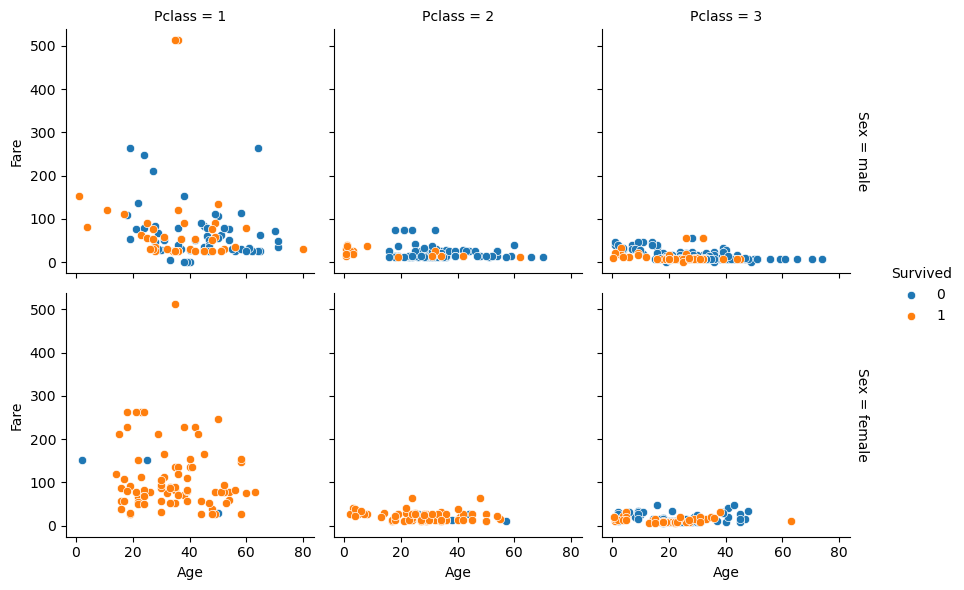

In [31]:
# Survival rate by Sex vs Pclass vs Age vs Fare
plt.figure()
fg = sns.FacetGrid(titanic, row="Sex", col="Pclass", hue="Survived", margin_titles=True)
fg.map(sns.scatterplot, "Age", "Fare")

fg.add_legend()
plt.show()
plt.close()

### Conclusion

Based on the plot, we can observe some patterns and trends:

- In general, female passengers had a higher survival rate than male passengers, regardless of their class or age. This is evident from the higher proportion of blue points in the female subplots compared to the male subplots.

- Among male passengers, those who were in the 1st class had a slightly higher survival rate than those who were in the 2nd or 3rd class. This is evident from the more blue points in the top left subplot compared to the bottom left and middle left subplots.

- Among female passengers, those who were in the 1st or 2nd class had a much higher survival rate than those who were in the 3rd class. This is evident from the almost all blue points in the top right and middle right subplots compared to the more orange points in the bottom right subplot.

- The age and fare of the passengers did not seem to have a clear effect on their survival rate. There is no obvious correlation between these variables and the color of the points in any subplot. However, it is possible that some outliers or confounding factors may have influenced these results. For example, some passengers may have been traveling with their families or friends, which could have affected their chances of survival.

These findings are consistent with the historical record, which shows that women, children, and first-class passengers were more likely to survive the Titanic disaster than men, third-class passengers, and adults.

---------------------------------------------------------------------------
#### My citings:

https://www.kaggle.com/code/demidova/titanic-eda-tutorial

https://www.kaggle.com/code/mjamilmoughal/eda-of-titanic-dataset-with-python-analysis

https://www.kaggle.com/code/kanncaa1/dataiteam-titanic-eda

https://www.kaggle.com/code/allohvk/titanic-advanced-eda

https://www.kaggle.com/code/mjamilmoughal/eda-of-titanic-dataset-with-python-analysis

https://www.w3schools.com/python/pandas/default.asp

------------------------------------------------------------
Thank you, Farinaaz Slamang